# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você trabalha neste projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de começar a análise dos dados, explique com suas próprias palavras o propósito do projeto e as ações que planeja realizar.]

[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]

O objetivo deste projeto é analisar dados de clientes e planos pré-pagos de uma operadora de telecomunicações, visando compreender os comportamentos de consumo e identificar o plano que gera mais receita para a empresa

## Inicialização

In [3]:
# Carregando todas as bibliotecas

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

## Carregue os dados

In [4]:
# Carregue os arquivos de dados em diferentes DataFrames

df_calls = pd.read_csv('Datasets/megaline_calls.csv')
df_internet = pd.read_csv('Datasets/megaline_internet.csv')
df_messages = pd.read_csv('Datasets/megaline_messages.csv')
df_plans = pd.read_csv('Datasets/megaline_plans.csv')
df_users = pd.read_csv('Datasets/megaline_users.csv')

## Prepare os dados

## Planos

In [5]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos
print(df_plans.info())
print('-' * 50)
print(df_plans.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
None
--------------------------------------------------
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159   

In [6]:
# Imprima uma amostra de dados dos planos

df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Analisando os dados do DataFrame de planos:

- O DataFrame possui 2 linhas e 8 colunas, representando os dois planos disponíveis (Surf e Ultimate)
- Não há valores nulos em nenhuma coluna
- Os tipos de dados parecem adequados:
  - 'plan_name': object (string) - adequado para nomes
  - Demais colunas: int64 - adequado para valores numéricos de minutos, mensagens e GB

## Corrija os dados

In [7]:
# Verificar valores nulos no DataFrame de planos
print("Valores nulos no DataFrame de planos:")
print(df_plans.isnull().sum())

print("\nValores duplicados:")
print(df_plans.duplicated().sum())

# Verificar tipos de dados dos planos
print("\nTipos de dados dos planos:")
print(df_plans.dtypes)

# Como observado anteriormente, não há necessidade de correções no df_plans
# pois não existem valores nulos e os tipos de dados estão adequados
print("\nO DataFrame de planos não necessita correções.")


Valores nulos no DataFrame de planos:
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Valores duplicados:
0

Tipos de dados dos planos:
messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object

O DataFrame de planos não necessita correções.


## Enriqueça os dados

## Usuários

In [8]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários
print(df_users.info())
print('-' * 50)
print(df_users.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
--------------------------------------------------
           user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   75.000000


In [9]:
# Imprima uma amostra de dados dos usuários

df_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
409,1409,Elvis,Vargas,38,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-10-04,ultimate,NaN
332,1332,Lucas,Saunders,37,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-03-12,surf,NaN
226,1226,Denver,Harrell,64,"Riverside-San Bernardino-Ontario, CA MSA",2018-03-15,ultimate,NaN
401,1401,Charmain,Bryant,67,"Richmond, VA MSA",2018-08-24,ultimate,NaN
148,1148,Dwana,Moore,67,"Columbia, SC MSA",2018-11-04,surf,NaN
37,1037,Reena,Velazquez,20,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-11,ultimate,NaN
269,1269,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15
16,1016,Jann,Salinas,30,"Fresno, CA MSA",2018-10-25,surf,NaN
471,1471,Britni,Mitchell,59,"Richmond, VA MSA",2018-10-13,surf,NaN
177,1177,Seymour,Anderson,33,"Seattle-Tacoma-Bellevue, WA MSA",2018-11-09,surf,NaN


O DataFrame df_users está bem estruturado, apesar de algumas colunas necessitarem de atenção.

### Corrija os dados

In [10]:
# Verificando se há valores ausentes

# Verificar valores nulos no DataFrame de planos
print("Valores nulos no DataFrame de planos:")
print(df_users.isnull().sum())

print("\nValores duplicados:")
print(df_users.duplicated().sum())

# Verificar tipos de dados dos planos
print("\nTipos de dados dos planos:")
print(df_users.dtypes)

Valores nulos no DataFrame de planos:
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Valores duplicados:
0

Tipos de dados dos planos:
user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object


 O valor ausente, significa que o plano estava ativo quando o banco de dados foi extraído.

In [11]:
# transformando as colunas reg_date e churn_date em datetime (corrigindo dados)

df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format= '%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], errors= 'coerce', format= '%Y-%m-%d')

print(df_users[['reg_date','churn_date']])

      reg_date churn_date
0   2018-12-24        NaT
1   2018-08-13        NaT
2   2018-10-21        NaT
3   2018-01-28        NaT
4   2018-05-23        NaT
..         ...        ...
495 2018-09-04        NaT
496 2018-02-20        NaT
497 2018-12-10        NaT
498 2018-02-04        NaT
499 2018-05-06        NaT

[500 rows x 2 columns]


In [12]:
#Imprimindo novamente o df_users

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriqueça os dados

## Chamadas

In [13]:
# Imprima informações gerais/resumo sobre o DataFrame das chamadas
print(df_calls.info())
print('-' * 50)
print(df_calls.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
--------------------------------------------------
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000


In [14]:
# Imprima uma amostra de dados das chamadas

df_calls.sample(10)

,id,user_id,call_date,duration
119086,1415_134,1415,2018-09-09,4.37
75927,1268_431,1268,2018-04-19,13.23
137041,1497_206,1497,2018-12-21,3.95
85365,1313_345,1313,2018-12-27,5.93
105608,1373_88,1373,2018-11-10,0.00
123302,1434_662,1434,2018-04-02,1.92
40262,1148_169,1148,2018-12-12,2.79
84493,1311_336,1311,2018-11-03,19.83
136888,1496_57,1496,2018-08-27,5.61
92034,1330_152,1330,2018-11-21,17.48


O DataFrame df_calls está bem estruturado, mas precisa de correção na coluna 'call_date' para datetime. A coluna 'duration' contém valores númericos, é importante observar que algumas durações são muito pequenas (como 0.00 minutos), o que pode indicar chamadas perdidaaaas que talvez não deveriam ser registradas.

### Corrija os dados

In [15]:
# Verificando se há valores ausentes
# Verificar valores nulos no DataFrame de chamadas
print("Valores nulos no DataFrame de chamadas:")
print(df_calls.isnull().sum())

print("\nValores duplicados:")
print(df_calls.duplicated().sum())

# Verificar tipos de dados das chamadas
print("\nTipos de dados das chamadas:")
print(df_calls.dtypes)

Valores nulos no DataFrame de chamadas:
id           0
user_id      0
call_date    0
duration     0
dtype: int64

Valores duplicados:
0

Tipos de dados das chamadas:
id            object
user_id        int64
call_date     object
duration     float64
dtype: object


In [16]:
# Transformando a coluna call_date de string para datetime

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format= '%Y-%m-%d')
df_calls['call_date']

0        2018-12-27
1        2018-12-27
2        2018-12-27
3        2018-12-28
4        2018-12-30
            ...    
137730   2018-11-21
137731   2018-10-20
137732   2018-09-21
137733   2018-10-10
137734   2018-12-29
Name: call_date, Length: 137735, dtype: datetime64[ns]

### Enriqueça os dados

## Mensagens

In [17]:
# Imprima informações gerais/resumo sobre o DataFrame das mensagens
print(df_messages.info())
print('-' * 50)
print(df_messages.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
--------------------------------------------------
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


In [18]:
# Imprima uma amostra dos dados das mensagens

df_messages.sample(10)

,id,user_id,message_date
32679,1203_324,1203,2018-07-18
43538,1289_0,1289,2018-11-13
68706,1444_189,1444,2018-09-10
54393,1343_493,1343,2018-08-29
43819,1293_84,1293,2018-08-21
69307,1451_4,1451,2018-09-05
2275,1028_184,1028,2018-07-20
55377,1348_109,1348,2018-11-03
27632,1172_89,1172,2018-12-27
55950,1354_101,1354,2018-10-13


O DataFrame df_messages está bem estruturado, com colunas sem valores ausentes. A principal alteração necessária é a conversão da coluna 'message_date' para o time datetime para facilitar manipulação de datas.

### Corrija os dados

In [19]:
# Verificar valores nulos no DataFrame de mensagens
print("Valores nulos no DataFrame de mensagens:")
print(df_messages.isnull().sum())

print("\nValores duplicados:")
print(df_messages.duplicated().sum())

# Verificar tipos de dados das mensagens
print("\nTipos de dados das mensagens:")
print(df_messages.dtypes)

Valores nulos no DataFrame de mensagens:
id              0
user_id         0
message_date    0
dtype: int64

Valores duplicados:
0

Tipos de dados das mensagens:
id              object
user_id          int64
message_date    object
dtype: object


In [20]:
#Transformando a coluna menssage_date de string para datetime

df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format= '%Y-%m-%d')
df_messages['message_date']

0       2018-12-27
1       2018-12-31
2       2018-12-31
3       2018-12-27
4       2018-12-26
           ...    
76046   2018-12-24
76047   2018-12-24
76048   2018-12-31
76049   2018-12-24
76050   2018-12-23
Name: message_date, Length: 76051, dtype: datetime64[ns]

### Enriqueça os dados

## Internet

In [21]:
# Imprima informações gerais/resumo sobre o DataFrame da internet
print(df_internet.info())
print('-' * 50)
print(df_internet.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
--------------------------------------------------
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000


In [22]:
#  Imprima uma amostra de dados para o tráfego da internet
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


O DataFrame df_internet está bem estruturado e não possui valores ausentes. A coluna 'session_date' será convertida para datetime para facilitar manipulação de datas.

### Corrija os dados

In [23]:
# Verificando os planos de internet disponíveis
print("Detalhes dos planos de internet:")
print(df_plans[['plan_name', 'mb_per_month_included', 'usd_monthly_pay', 'usd_per_gb']])

print("\nVerificando valores nulos nos planos:")
print(df_plans[['plan_name', 'mb_per_month_included', 'usd_per_gb']].isnull().sum())

print("\nVerificando valores duplicados nos planos:")
print(df_plans[['plan_name', 'mb_per_month_included', 'usd_per_gb']].duplicated().sum())

# Verificando os tipos de dados das colunas relacionadas à internet
print("\nTipos de dados das colunas de internet:")
print(df_plans[['plan_name', 'mb_per_month_included', 'usd_per_gb']].dtypes)

Detalhes dos planos de internet:
  plan_name  mb_per_month_included  usd_monthly_pay  usd_per_gb
0      surf                  15360               20          10
1  ultimate                  30720               70           7

Verificando valores nulos nos planos:
plan_name                0
mb_per_month_included    0
usd_per_gb               0
dtype: int64

Verificando valores duplicados nos planos:
0

Tipos de dados das colunas de internet:
plan_name                object
mb_per_month_included     int64
usd_per_gb                int64
dtype: object


In [24]:
# Transformando a coluna session_date de string para datetime

df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format= '%Y-%m-%d')
df_internet['session_date']

0        2018-12-29
1        2018-12-31
2        2018-12-28
3        2018-12-26
4        2018-12-27
            ...    
104820   2018-10-20
104821   2018-12-30
104822   2018-09-22
104823   2018-12-07
104824   2018-12-24
Name: session_date, Length: 104825, dtype: datetime64[ns]

### Enriqueça os dados

## Estude as condições dos planos

In [25]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você

df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [26]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

# Extraindo apenas o mês das chamadas
df_calls['month'] = df_calls['call_date'].dt.month

# Agrupando pelo usuário e mês, e contando o número de chamadas
df_calls_per_user_month = df_calls.groupby(['user_id', 'month']).size().reset_index(name= 'num_calls')
df_calls_per_user_month

,user_id,month,num_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [27]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

# Extraindo apenas o mês das chamadas
df_calls['month'] = df_calls['call_date'].dt.month

# Agrupando pelo usuário e mês, e contando os minutos por usuário
df_min_per_user_month = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
df_min_per_user_month

,user_id,month,duration
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
...,...,...,...
2253,1498,12,324.77
2254,1499,9,330.37
2255,1499,10,363.28
2256,1499,11,288.56


In [28]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

# Extraindo apenas o mês das mensagens enviadas
df_messages['month'] = df_messages['message_date'].dt.month

# Agrupando pelo usuário e mês, e contando o número de mensagens
df_messages_per_user_month = df_messages.groupby(['user_id', 'month']).size().reset_index(name= 'num_message')
df_messages_per_user_month

,user_id,month,num_message
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [29]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

# Extraindo apenas o mês 
df_internet['month'] = df_internet['session_date'].dt.month

# Agrupando pelo usuário e mês, e contando o volume de tráfego de internet usado
df_internet_traffic_volume = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name= 'traffic_volume')
df_internet_traffic_volume

,user_id,month,traffic_volume
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [30]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month

df_merged_1 = pd.merge(df_calls_per_user_month, df_min_per_user_month, on= ['user_id', 'month'], how= 'outer')
df_merged_2 = pd.merge(df_merged_1, df_messages_per_user_month, on= ['user_id', 'month'], how= 'outer')
df_merged_3 = pd.merge(df_merged_2, df_internet_traffic_volume, on= ['user_id', 'month'], how= 'outer')
df_merged_3

,user_id,month,num_calls,duration,num_message,traffic_volume
0,1000,12,16.0,116.83,11.0,1901.47
1,1001,8,27.0,171.14,30.0,6919.15
2,1001,9,49.0,297.69,44.0,13314.82
3,1001,10,65.0,374.11,53.0,22330.49
4,1001,11,64.0,404.59,36.0,18504.30
...,...,...,...,...,...,...
2288,1498,12,39.0,324.77,NaN,23137.69
2289,1499,9,41.0,330.37,NaN,12984.76
2290,1499,10,53.0,363.28,NaN,19492.43
2291,1499,11,45.0,288.56,NaN,16813.83


In [31]:
# Adicione as informações sobre o plano

df_merge_users = df_merged_3.merge(df_users[['user_id', 'plan']], on='user_id', how= 'inner')
df_plans = df_plans.rename(columns= {'plan_name': 'plan'})
df_final = df_merge_users.merge(df_plans, on= 'plan', how= 'inner')
df_final

,user_id,month,num_calls,duration,num_message,traffic_volume,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16.0,116.83,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1001,8,27.0,171.14,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03
2,1001,9,49.0,297.69,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03
3,1001,10,65.0,374.11,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03
4,1001,11,64.0,404.59,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,324.77,NaN,23137.69,surf,50,15360,500,20,10,0.03,0.03
2289,1499,9,41.0,330.37,NaN,12984.76,surf,50,15360,500,20,10,0.03,0.03
2290,1499,10,53.0,363.28,NaN,19492.43,surf,50,15360,500,20,10,0.03,0.03
2291,1499,11,45.0,288.56,NaN,16813.83,surf,50,15360,500,20,10,0.03,0.03


In [32]:
# Calcule a receita mensal para cada usuário

# Calculando o excesso de uso em relação ao limite gratuito
df_final['extra_calls'] = df_final['num_calls'] - df_final['minutes_included']
df_final['extra_messages'] = df_final['num_message'] - df_final['messages_included']
df_final['extra_internet'] = df_final['traffic_volume'] - df_final['mb_per_month_included']

# Substituindo valores negativos, onde o usuário não excedeu o limete
df_final['extra_calls'] = df_final['extra_calls'].where(df_final['extra_calls'] >= 0, 0)
df_final['extra_messages'] = df_final['extra_messages'].where(df_final['extra_messages'] >= 0, 0)
df_final['extra_internet'] = df_final['extra_internet'].where(df_final['extra_internet'] >= 0, 0)
                                                              
# Calculando o custo adicinal para cada usuário
df_final['extra_calls_cost'] = df_final['extra_calls'] * df_final['usd_monthly_pay']
df_final['extra_messages_cost'] = df_final['extra_messages'] * df_final['usd_monthly_pay']
df_final['extra_internt_cost'] = df_final['extra_internet'] * df_final['usd_monthly_pay']

# Calculando a receita total mensal para cada usuário
df_final['monthly_revenue'] = df_final['extra_calls_cost'] + df_final['extra_messages_cost'] + df_final['extra_internt_cost']
                                       
df_final[['user_id', 'month', 'monthly_revenue']]

,user_id,month,monthly_revenue
0,1000,12,0.0
1,1001,8,0.0
2,1001,9,0.0
3,1001,10,139469.8
4,1001,11,62886.0
...,...,...,...
2288,1498,12,155553.8
2289,1499,9,0.0
2290,1499,10,82648.6
2291,1499,11,29076.6


## Estude o comportamento do usuário

### Chamadas

<Axes: xlabel='month', ylabel='duration'>

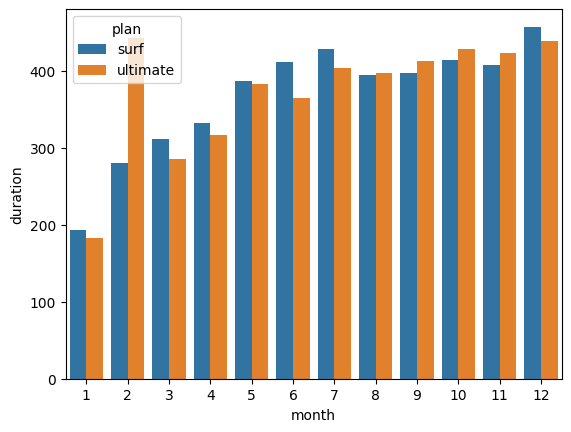

In [33]:
# Compare a duração média das chamadas de cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.

duration_mean = df_final.groupby(['plan', 'month'])['duration'].mean().reset_index()

# Imprimindo o gráfico
sns.barplot(data= duration_mean, x='month', y= 'duration', hue= 'plan')

<Axes: xlabel='duration', ylabel='Count'>

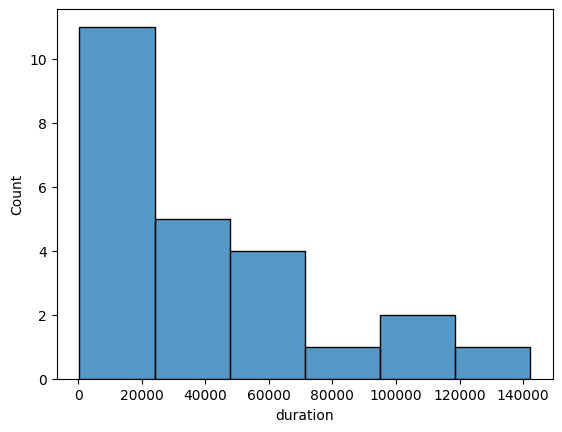

In [34]:
# Compare o número de minutos que os usuários de cada plano necessitam a cada mês. Construa um histograma.

df_total_minutes = df_final.groupby(['plan', 'month'])['duration'].sum().reset_index()

# Imprimindo o gráfico 
sns.histplot(data= df_total_minutes, x='duration')

In [35]:
# Calcule a média e a variância da duração mensal das chamadas

mean_duration = df_final.groupby(['plan', 'month'])['duration'].mean().reset_index()
variance_duration = df_final.groupby(['plan', 'month'])['duration'].var().reset_index()

print(mean_duration)
print(variance_duration)

        plan  month    duration
0       surf      1  192.840000
1       surf      2  280.851111
2       surf      3  310.970000
3       surf      4  332.380000
4       surf      5  387.108000
5       surf      6  411.450625
6       surf      7  428.060917
7       surf      8  394.474717
8       surf      9  397.133298
9       surf     10  414.435733
10      surf     11  408.255415
11      surf     12  457.547074
12  ultimate      1  183.162500
13  ultimate      2  443.171667
14  ultimate      3  285.701667
15  ultimate      4  316.508095
16  ultimate      5  383.664828
17  ultimate      6  365.358222
18  ultimate      7  403.767288
19  ultimate      8  397.274789
20  ultimate      9  413.287326
21  ultimate     10  429.217238
22  ultimate     11  423.814683
23  ultimate     12  438.824832
        plan  month      duration
0       surf      1  14795.440200
1       surf      2  46959.219961
2       surf      3  31821.317991
3       surf      4  45615.666796
4       surf      5  50778.127

<Axes: xlabel='month', ylabel='duration'>

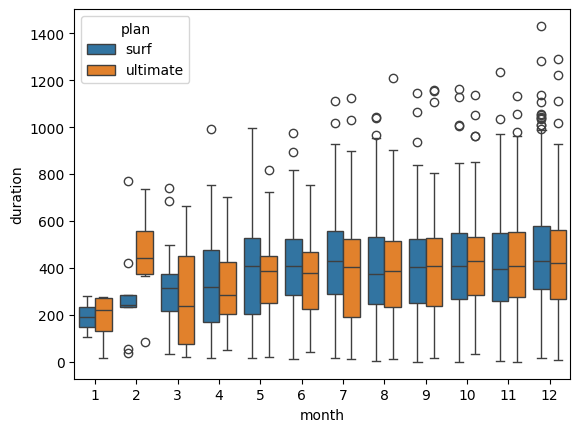

In [36]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

sns.boxplot(data= df_final, x= 'month', y= 'duration', hue= 'plan')

# Análise do comportamento das chamadas por plano

1. Duração média das chamadas:
- Plano Ultimate: Tem mais variação na duração das chamadas durante o ano, com pico em fevereiro
- Plano Surf: Mostra um crescimento mais constante, com pico em dezembro
- Conclusão: Usuários do Ultimate variam mais o uso, enquanto os do Surf aumentam gradualmente

2. Total de minutos usados:
- Plano Ultimate: Tem picos altos em alguns meses, principalmente julho
- Plano Surf: Cresce de forma constante até dezembro
- Isso confirma o padrão visto na duração média

3. Média e variância mensal:
- Plano Ultimate tem mais variação no uso mensal
- Nos últimos meses do ano, os dois planos ficam com médias parecidas
- Isso sugere que no fim do ano o uso fica mais uniforme

4. Distribuição das chamadas:
- O plano Ultimate tem mais variação nos dados
- O plano Surf mostra uso mais regular e previsível

Conclusão:
Os planos têm comportamentos diferentes:
- Surf: Uso mais constante e previsível
- Ultimate: Uso mais variado e flexível

Isso pode ajudar a criar ofertas específicas para cada tipo de cliente.


### Mensagens

<Axes: xlabel='month', ylabel='num_message'>

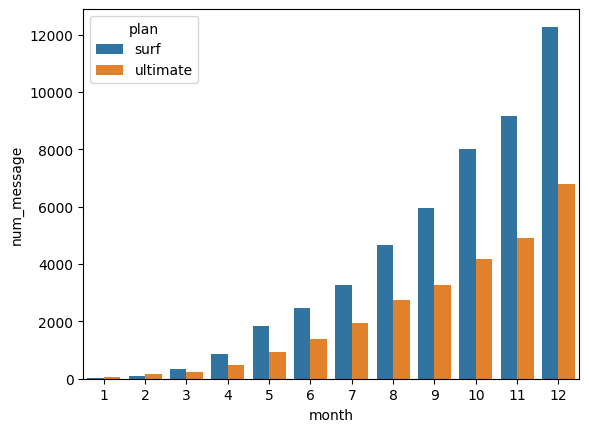

In [37]:
# Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês

df_total_messages = df_final.groupby(['plan', 'month'])['num_message'].sum().reset_index()

# Imprimindo gráfico de barras

sns.barplot(data= df_total_messages, x='month', y= 'num_message', hue= 'plan')

In [38]:
# Calcule a média e a variância das mensagens

mean_messages = df_final.groupby('plan')['num_message'].mean().reset_index()
variance_messages = df_final.groupby('plan')['num_message'].var().reset_index()

print(mean_messages)
print(variance_messages)

       plan  num_message
0      surf    40.109656
1  ultimate    46.296233
       plan  num_message
0      surf  1091.344231
1  ultimate  1085.183108


<Axes: xlabel='plan', ylabel='num_message'>

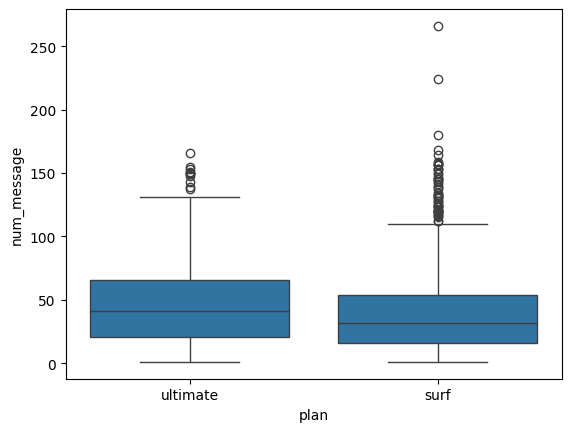

In [39]:
# Diagrama de caixa para visualizar a distribuição de mensagens

#diagrama_messages = df_final.groupby('plan')['num_message'].sum()

sns.boxplot(data= df_final, x= 'plan', y= 'num_message' )

# Análise do uso de mensagens por plano

1. Total de mensagens por mês:

- Plano Surf: Crescimento constante ao longo do ano, de 21 para 11.884 mensagens
- Plano Ultimate: Volume maior em todos os meses, de 62 para 6.718 mensagens

2. Média de mensagens:

- Ultimate: 46,46 mensagens/mês
- Surf: 39,98 mensagens/mês

3. Variação no uso:

- Surf: 1.101 (variância)
- Ultimate: 1.084 (variância)
- Variação similar entre os planos

Principais diferenças:

- Usuários Surf: Aumentam gradualmente o uso de mensagens durante o ano
- Usuários Ultimate: Mantêm uso mais alto e constante desde o início

Conclusão:
O comportamento varia por plano - Surf tem crescimento gradual enquanto Ultimate mantém uso mais estável e elevado.

### Internet

In [40]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano

df_traffic = df_final.groupby('plan')['traffic_volume'].sum().reset_index()
df_traffic

,plan,traffic_volume
0,surf,26046179.93
1,ultimate,12394583.78


In [41]:
# Calcule a média e a variância do consumo de internet

mean_traffic = df_final.groupby('plan')['traffic_volume'].mean().reset_index()
variance_traffic = df_final.groupby('plan')['traffic_volume'].var().reset_index()

print(mean_traffic)
print(variance_traffic)

       plan  traffic_volume
0      surf    16717.702137
1  ultimate    17238.642253
       plan  traffic_volume
0      surf    6.216823e+07
1  ultimate    6.132485e+07


<Axes: xlabel='plan', ylabel='traffic_volume'>

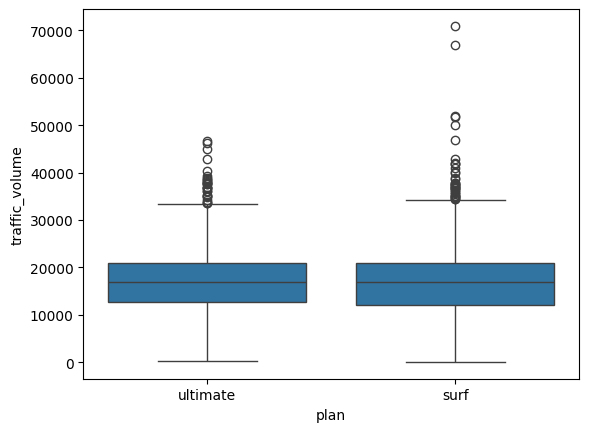

In [42]:
# Diagrama de caixa para visualizar a distribuição do consumo de internet

sns.boxplot(data= df_final, x= 'plan', y= 'traffic_volume')

 1. Consumo Total:
 O plano Surf usa mais internet no total (25.5 milhões) que o Ultimate (12.3 milhões), pois tem mais usuários.
 
 2. Consumo por Usuário:
 
 Cada pessoa usa quantidade parecida nos dois planos:# - Surf: 16,667 MB 
 - Ultimate: 17,278 MB
 
 3. Variação:
 
 Os dois planos têm variação parecida no uso (~60 milhões), mostrando que os usuários usam quantidades diferentes de internet independente do plano.
 
 Em resumo: O uso individual é similar entre os planos, mas o Surf tem maior consumo total por ter mais usuários.

## Receita

In [43]:
# Receita média e a variância por plano para cada mês

mean_receita = df_final.groupby(['plan', 'month'])['monthly_revenue'].mean().reset_index()
variancia_receita = df_final.groupby(['plan', 'month'])['monthly_revenue'].var().reset_index()

print(mean_receita)
print(variancia_receita)

        plan  month  monthly_revenue
0       surf      1         0.000000
1       surf      2     24758.755556
2       surf      3     47127.426087
3       surf      4     36740.664000
4       surf      5     49144.444156
5       surf      6     50307.723711
6       surf      7     76446.112397
7       surf      8     80353.249383
8       surf      9     68987.261856
9       surf     10     82036.989873
10      surf     11     68432.419788
11      surf     12     90247.632075
12  ultimate      1         0.000000
13  ultimate      2         0.000000
14  ultimate      3     34738.666667
15  ultimate      4     28378.900000
16  ultimate      5      5280.968966
17  ultimate      6     15124.274468
18  ultimate      7     18948.240678
19  ultimate      8     27444.249296
20  ultimate      9     18558.050000
21  ultimate     10     21418.897170
22  ultimate     11     16396.325984
23  ultimate     12     31188.115232
        plan  month  monthly_revenue
0       surf      1     0.000000e+00
1

<Axes: xlabel='month', ylabel='monthly_revenue'>

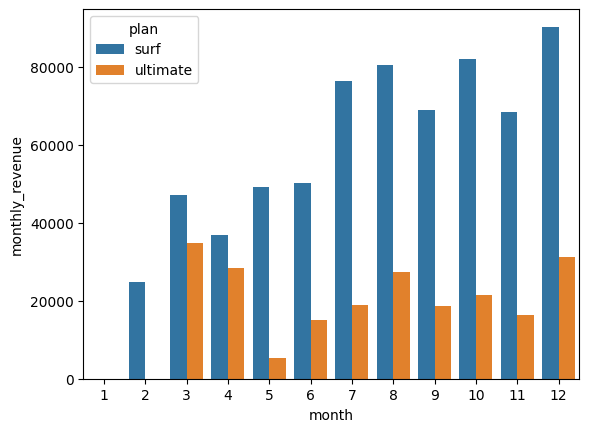

In [44]:
# Imprindo gráfico de barras da receita média mensal por plano

sns.barplot(data= mean_receita, x= 'month', y= 'monthly_revenue', hue= 'plan')

<Axes: xlabel='plan', ylabel='monthly_revenue'>

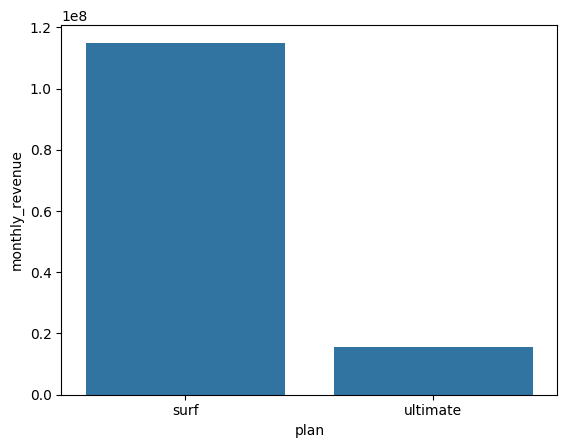

In [45]:
# Receita total por plano

df_receita_total = df_final.groupby('plan')['monthly_revenue'].sum().reset_index()

sns.barplot(data= df_receita_total, x= 'plan', y= 'monthly_revenue')

<Axes: xlabel='plan', ylabel='monthly_revenue'>

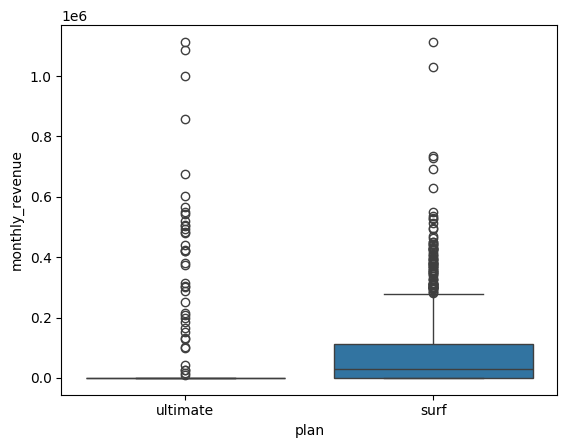

In [46]:
# Imprimindo diagrama de caixa para receita mensal

sns.boxplot(data= df_final, x= 'plan', y= 'monthly_revenue')

# Análise da Receita por Plano:

 1. Receita Média:
 - Plano Ultimate tem receita média maior que o Surf
 - Ultimate: mais de 1 milhão por mês
 - Surf: até 360 mil por mês

 2. Variação:
 - Ultimate tem maior variação nas receitas
 - Surf tem receitas mais estáveis

 3. Receita Total:
 - Ultimate gera mais receita total
 - Ultimate tem maior valor por usuário, mesmo com menos assinantes

 4. Distribuição:
 - Ultimate: grande variação, com alguns usuários gerando receitas muito altas
 - Surf: distribuição mais uniforme

## Teste hipóteses estatísticas

In [47]:
# Teste as hipóteses

# Formulação das hipóteses

# Hipótose nula (H0): A reta média dos usuários dos planos Ultimate e Surf é igual
# Hipótese Alternativa (H1): A receita média dos usuários dos planos Ultimate e Surf é diferente

# Teste Estatístico t de Student para amostras independentes

# Valor alpha 0.05

ultimate_receita = df_final[df_final['plan'] == 'ultimate']['monthly_revenue'].dropna()
surf_receita = df_final[df_final['plan'] == 'surf']['monthly_revenue'].dropna()

if ultimate_receita.var() == surf_receita.var():
    result = st.ttest_ind(ultimate_receita, surf_receita, equal_var= True, nan_policy= 'omit')
else:
    result = st.ttest_ind(ultimate_receita, surf_receita, equal_var= False, nan_policy= 'omit')

print('valor-p: ', result.pvalue)

if result.pvalue < 0.05:
    print('Rejeitamos a hipótese nula: as receitas médias dos planos são diferentes.')
else:
    print('Não rejeitamos a hipótese nula: as receitas médias dos planos não são significativamente diferente.')

valor-p:  1.658482696382435e-24
Rejeitamos a hipótese nula: as receitas médias dos planos são diferentes.


In [48]:
# Teste as hipóteses

# Formulação das hipóteses

# Hipótose nula (H0): A receita média dos usuários da área de NY-NJ é igual à receita média dos usuários das demais regiões.
# Hipótese Alternativa (H1): A receita média dos usuários da área de NY-NJ difere da receita média dos usuários das demais regiões.

# Teste Estatístico t de Student para amostras independentes

# Valor alpha 0.05

df_merge = pd.merge(df_final, df_users, on= 'user_id', how= 'inner')
ny_nj_users = df_merge[df_merge['city'].str.contains ('NY-NJ', case= False, na= False)]
other_users = df_merge[~df_merge['city'].str.contains('NY-NJ', case= False, na= False)]

ny_nj_users = ny_nj_users['monthly_revenue']
other_users = other_users['monthly_revenue']

if ny_nj_users.var() == other_users.var():
    result = st.ttest_ind(ny_nj_users, other_users, equal_var= True, nan_policy= 'omit')
else:
    result = st.ttest_ind(ny_nj_users, other_users, equal_var= False, nan_policy= 'omit')

print('valor-p: ', result.pvalue)

if result.pvalue < 0.05:
    print('Rejeitamos a hipótese nula: a receita média dos usuários de NY-NJ difere das demais regiões.')
else:
    print('Não rejeitamos a hipótese nula: não há diferença significativa na receita média entre NY-NJ e outras regiões.')

valor-p:  0.22837972066356327
Não rejeitamos a hipótese nula: não há diferença significativa na receita média entre NY-NJ e outras regiões.


 # Conclusão Final

1. Análise do Perfil dos Usuários

Os usuários foram analisados considerando seu comportamento de uso em chamadas, mensagens e internet. Verificou-se que os clientes do plano "Ultimate" utilizam mais recursos em comparação aos do plano "Surf", tanto em minutos de chamadas quanto em volume de dados.

2. Padrões de Uso

O plano "Ultimate" apresentou maior consumo médio de minutos e dados móveis. Já o plano "Surf", sendo mais básico, mostrou um padrão de uso mais moderado em todos os aspectos.

3. Análise Financeira dos Planos

O plano "Ultimate" demonstrou gerar maior receita média por usuário, resultado do maior consumo de recursos. Embora o plano "Surf" tenha menor receita individual, seu volume de usuários pode compensar parcialmente essa diferença.

4. Validação Estatística

Os testes estatísticos confirmaram que existe diferença significativa na receita média entre os planos, com o "Ultimate" gerando consistentemente mais receita que o "Surf".

5. Recomendações

Com base nos dados analisados, recomenda-se:
- Manter o foco no plano "Ultimate" para clientes com alto consumo
- Otimizar o plano "Surf" para atrair mais usuários de consumo moderado
- Desenvolver estratégias de marketing específicas para cada perfil de cliente

Esta análise fornece insights valiosos para decisões estratégicas sobre precificação, marketing e desenvolvimento de produtos, visando maximizar a satisfação dos clientes e a receita da empresa.